##  1.Installation et importation des bibliothéques requises

In [1]:
# Installation de tensorflow
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

  Using cached tensorflow_gpu-1.15.0-cp37-cp37m-win_amd64.whl (294.5 MB)
  Using cached tensorflow-1.15.0-cp37-cp37m-win_amd64.whl (295.1 MB)
  Using cached stable_baselines-2.10.2-py3-none-any.whl (240 kB)
  Using cached gym_anytrading-1.2.0-py3-none-any.whl (171 kB)
  Using cached gym-0.21.0-py3-none-any.whl
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_estimator-1.15.1-py2.py3-none-any.whl (503 kB)
  Using cached grpcio-1.42.0-cp37-cp37m-win_amd64.whl (3.2 MB)
  Using cached numpy-1.21.4-cp37-cp37m-win_amd64.whl (14.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.2.2-py3-none-any.whl
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached protobuf-3.19.1-cp37-cp37m-win_amd64.whl (896 kB)
  Using cached tensorboard-

In [1]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C, PPO2


# Processing libraries
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

C:\Users\almamy\anaconda3\envs\envpy37\lib\site-packages\ale_py\roms\utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\almamy\anaconda3\envs\envpy37\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


## 2. Chargement et prétraitement des données

In [71]:
# Chargement des données
def loadfile(path):
    df = pd.read_csv(path)
    return df

path = 'data/gmedata.csv'
loadfile(path)

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.50,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.00,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.00,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.90,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.50,"63,565,621"
...,...,...,...,...,...,...
246,03/20/2020,4.08,4.08,3.65,3.76,"7,722,194"
247,03/19/2020,3.71,4.20,3.55,4.19,"5,039,539"
248,03/18/2020,4.10,4.25,3.50,3.77,"3,651,709"
249,03/17/2020,4.40,4.65,4.11,4.23,"3,562,210"


In [72]:
# Types des variables
df = loadfile(path)
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [73]:
# Convetir la columne date en format date
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [74]:
# Recherche des valeurs manquantes
def missing_cols(df):
  #print out columns with its amount of missing values
  total = 0
  for col in df.columns:
    missing_vals = df[col].isnull().sum()
    total += missing_vals
    if missing_vals != 0:
      print(f"{col} => {df[col].isnull().sum()}")
  
  if total == 0:
    print("no missing values left")

missing_cols(df)

no missing values left


In [75]:
# Transformer la colonne date en colonne indexe
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [76]:
# Trier les données par ordre ascendant
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


## 2. Création et visualisation de  l'environment de trading

In [77]:
# Transmission des données et création de notre modéle
env = gym.make('stocks-v0', df = df, frame_bound = (5, 100), window_size = 5)

In [78]:
# looking at the environemnt
# prices
env.prices

array([4.37, 4.23, 3.77, 4.19, 3.76, 3.81, 4.16, 4.17, 4.41, 4.22, 3.65,
       3.5 , 3.25, 2.85, 2.8 , 3.09, 3.27, 3.41, 3.89, 4.74, 5.95, 5.27,
       5.03, 4.88, 5.61, 4.78, 4.89, 4.7 , 4.77, 5.82, 5.64, 6.04, 5.73,
       6.05, 5.48, 5.39, 4.93, 4.87, 4.98, 4.76, 4.54, 4.21, 4.13, 4.22,
       4.58, 4.44, 4.43, 4.44, 4.18, 4.42, 4.69, 4.33, 4.06, 4.13, 4.18,
       4.44, 4.47, 4.14, 5.01, 4.96, 5.07, 4.37, 4.72, 4.69, 4.64, 4.76,
       4.95, 4.88, 4.87, 4.83, 4.41, 4.46, 4.35, 4.38, 4.34, 4.44, 4.29,
       4.24, 4.09, 4.26, 4.21, 4.34, 4.26, 4.08, 4.19, 4.17, 3.96, 3.85,
       4.01, 4.11, 4.11, 4.03, 4.01, 3.94, 4.06, 4.1 , 4.01, 4.15, 4.43,
       4.63])

In [79]:
# Caractéristiques du signal
env.signal_features

array([[ 4.37,  0.  ],
       [ 4.23, -0.14],
       [ 3.77, -0.46],
       [ 4.19,  0.42],
       [ 3.76, -0.43],
       [ 3.81,  0.05],
       [ 4.16,  0.35],
       [ 4.17,  0.01],
       [ 4.41,  0.24],
       [ 4.22, -0.19],
       [ 3.65, -0.57],
       [ 3.5 , -0.15],
       [ 3.25, -0.25],
       [ 2.85, -0.4 ],
       [ 2.8 , -0.05],
       [ 3.09,  0.29],
       [ 3.27,  0.18],
       [ 3.41,  0.14],
       [ 3.89,  0.48],
       [ 4.74,  0.85],
       [ 5.95,  1.21],
       [ 5.27, -0.68],
       [ 5.03, -0.24],
       [ 4.88, -0.15],
       [ 5.61,  0.73],
       [ 4.78, -0.83],
       [ 4.89,  0.11],
       [ 4.7 , -0.19],
       [ 4.77,  0.07],
       [ 5.82,  1.05],
       [ 5.64, -0.18],
       [ 6.04,  0.4 ],
       [ 5.73, -0.31],
       [ 6.05,  0.32],
       [ 5.48, -0.57],
       [ 5.39, -0.09],
       [ 4.93, -0.46],
       [ 4.87, -0.06],
       [ 4.98,  0.11],
       [ 4.76, -0.22],
       [ 4.54, -0.22],
       [ 4.21, -0.33],
       [ 4.13, -0.08],
       [ 4.

info {'total_reward': -0.5000000000000031, 'total_profit': 0.6663492907994728, 'position': 0}


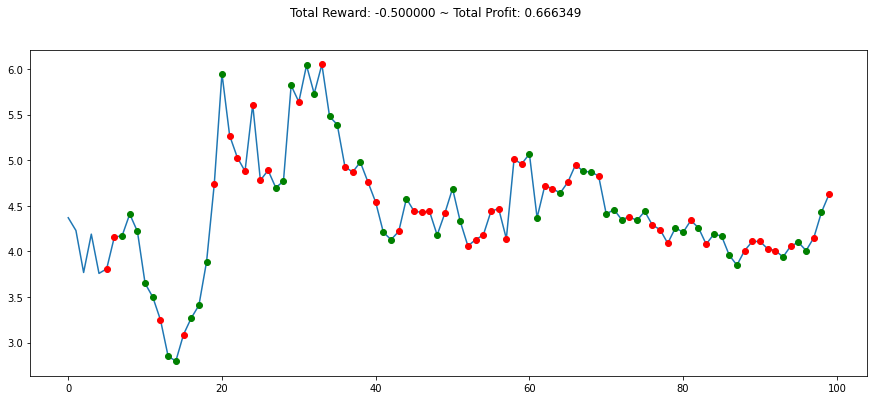

In [80]:
# Configuration de l'environnement de l'agent
state = env.reset() 
while True:
    action = env.action_space.sample() 
    n_state, reward, done, info = env.step(action) 
   
    
    if done:
        print("info", info)
        break
plt.figure(figsize=(15,6))
plt.cla()

env.render_all() 
plt.show()

## 2.1 Ajout des indicateurs personnalisés

### 2.1.1 Installation et importation des nouvelles dépendances

In [44]:
!pip install finta

In [81]:
from gym_anytrading.envs import StocksEnv
from finta import TA

### 2.1.2 Conversion de la columne Volume en numérique

In [82]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [83]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [84]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

### 2.1.4 Calcul SMA, RSI et OBV

In [85]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)

In [86]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,NaN,NaN,NaN
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,NaN,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,NaN,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,NaN,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,NaN,29.351457,-9896574.0


In [87]:
df.fillna(0, inplace= True)
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.0,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.0,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.0,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.0,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.0,29.351457,-9896574.0


### 2.1.4  Création de nouveau environnement

In [88]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:,'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume', 'SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [89]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(5, 100))

In [92]:
env2.signal_features

array([[ 3.90000000e+00,  4.86669600e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.11000000e+00,  3.56221000e+06,  0.00000000e+00,
         0.00000000e+00, -3.56221000e+06],
       [ 3.50000000e+00,  3.65170900e+06,  0.00000000e+00,
         0.00000000e+00, -7.21391900e+06],
       [ 3.55000000e+00,  5.03953900e+06,  0.00000000e+00,
         4.33948339e+01, -2.17438000e+06],
       [ 3.65000000e+00,  7.72219400e+06,  0.00000000e+00,
         2.93514572e+01, -9.89657400e+06],
       [ 3.50000000e+00,  6.00978400e+06,  0.00000000e+00,
         3.21029638e+01, -3.88679000e+06],
       [ 3.89000000e+00,  6.80565900e+06,  0.00000000e+00,
         4.75129499e+01,  2.91886900e+06],
       [ 4.04000000e+00,  3.59205900e+06,  0.00000000e+00,
         4.78769470e+01,  6.51092800e+06],
       [ 4.24000000e+00,  6.21097900e+06,  0.00000000e+00,
         5.57995572e+01,  1.27219070e+07],
       [ 4.15000000e+00,  7.02476300e+06,  0.00000000e+00,
         4.93981406e+01

## 3. Construction de l'environnement et entrainement de nos différents modéles

In [94]:
# Environnement du modéle 
#env_maker = lambda: gym.make('stocks-v0', df = df, frame_bound=(5, 100), window_size=5)
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [95]:
# Entrainement du modéle A2C
def train_A2C(env_train, timesteps):
    start = time.time()
    model = A2C('MlpPolicy', env_train, verbose=1)
    model.learn(total_timesteps=timesteps)
    end = time.time()
    print("Training time (A2C):", (end-start)/60,"minutes")
    return model
env_train = env
timesteps=10000
train_A2C(env, timesteps)

---------------------------------
| explained_variance | -8.59    |
| fps                | 22       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.201    |
---------------------------------
---------------------------------
| explained_variance | -16.6    |
| fps                | 561      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 1.55     |
---------------------------------
---------------------------------
| explained_variance | -5.61    |
| fps                | 681      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 1.24     |
---------------------------------
----------------------------------
| explained_variance | -1.27e+03 |
| fps                | 726       |
| nupdates           | 300       |
| policy_entropy     | 0.693     |
| total_t

In [96]:
# Entrainement du modéle PPO
def train_PPO(env_train,  timesteps):
    start = time.time()
    model = PPO2('MlpPolicy', env_train, verbose = 1)
    model.learn(total_timesteps=timesteps)
    end = time.time()
    print("Training time (PPO):", (end-start)/60,"minutes")
    return model
env_train = env
timesteps=10000
train_PPO(env, timesteps)

--------------------------------------
| approxkl           | 0.00016329416 |
| clipfrac           | 0.0           |
| explained_variance | -0.686        |
| fps                | 267           |
| n_updates          | 1             |
| policy_entropy     | 0.6929473     |
| policy_loss        | -0.004442195  |
| serial_timesteps   | 128           |
| time_elapsed       | 0             |
| total_timesteps    | 128           |
| value_loss         | 0.21867694    |
--------------------------------------
--------------------------------------
| approxkl           | 4.271244e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.0612       |
| fps                | 751           |
| n_updates          | 2             |
| policy_entropy     | 0.6924286     |
| policy_loss        | -0.0018115062 |
| serial_timesteps   | 256           |
| time_elapsed       | 0.48          |
| total_timesteps    | 256           |
| value_loss         | 0.22548851    |
-------------------------

--------------------------------------
| approxkl           | 0.00018185054 |
| clipfrac           | 0.0           |
| explained_variance | 0.757         |
| fps                | 920           |
| n_updates          | 18            |
| policy_entropy     | 0.6339451     |
| policy_loss        | -0.004232392  |
| serial_timesteps   | 2304          |
| time_elapsed       | 2.7           |
| total_timesteps    | 2304          |
| value_loss         | 0.1332673     |
--------------------------------------
---------------------------------------
| approxkl           | 0.000106955755 |
| clipfrac           | 0.0            |
| explained_variance | 0.837          |
| fps                | 1058           |
| n_updates          | 19             |
| policy_entropy     | 0.6346172      |
| policy_loss        | -0.0010951433  |
| serial_timesteps   | 2432           |
| time_elapsed       | 2.84           |
| total_timesteps    | 2432           |
| value_loss         | 0.05468974     |
-------------

-------------------------------------
| approxkl           | 0.0002414126 |
| clipfrac           | 0.0          |
| explained_variance | 0.948        |
| fps                | 943          |
| n_updates          | 35           |
| policy_entropy     | 0.4847077    |
| policy_loss        | -0.004122804 |
| serial_timesteps   | 4480         |
| time_elapsed       | 4.9          |
| total_timesteps    | 4480         |
| value_loss         | 0.031298753  |
-------------------------------------
--------------------------------------
| approxkl           | 0.00022419826 |
| clipfrac           | 0.0           |
| explained_variance | 0.938         |
| fps                | 1066          |
| n_updates          | 36            |
| policy_entropy     | 0.45640483    |
| policy_loss        | -0.004251498  |
| serial_timesteps   | 4608          |
| time_elapsed       | 5.04          |
| total_timesteps    | 4608          |
| value_loss         | 0.037311006   |
--------------------------------------

---------------------------------------
| approxkl           | 0.000686021    |
| clipfrac           | 0.0            |
| explained_variance | 0.97           |
| fps                | 631            |
| n_updates          | 52             |
| policy_entropy     | 0.34475186     |
| policy_loss        | -0.00077800197 |
| serial_timesteps   | 6656           |
| time_elapsed       | 7.75           |
| total_timesteps    | 6656           |
| value_loss         | 0.019628441    |
---------------------------------------
--------------------------------------
| approxkl           | 0.0021155165  |
| clipfrac           | 0.025390625   |
| explained_variance | 0.956         |
| fps                | 664           |
| n_updates          | 53            |
| policy_entropy     | 0.3323925     |
| policy_loss        | -0.0092378305 |
| serial_timesteps   | 6784          |
| time_elapsed       | 7.96          |
| total_timesteps    | 6784          |
| value_loss         | 0.035740748   |
------------

--------------------------------------
| approxkl           | 8.350137e-05  |
| clipfrac           | 0.0           |
| explained_variance | 0.971         |
| fps                | 902           |
| n_updates          | 69            |
| policy_entropy     | 0.18085341    |
| policy_loss        | -0.0016161598 |
| serial_timesteps   | 8832          |
| time_elapsed       | 10.2          |
| total_timesteps    | 8832          |
| value_loss         | 0.019774668   |
--------------------------------------
--------------------------------------
| approxkl           | 0.000649251   |
| clipfrac           | 0.009765625   |
| explained_variance | 0.99          |
| fps                | 969           |
| n_updates          | 70            |
| policy_entropy     | 0.18206766    |
| policy_loss        | -0.0045801736 |
| serial_timesteps   | 8960          |
| time_elapsed       | 10.4          |
| total_timesteps    | 8960          |
| value_loss         | 0.008036969   |
-------------------------

## 4. Evaluation des différents modéles

In [97]:
# Fonction d'évaluation des modéles
def evalmodel(envname, modelname):
    obs=env.reset()
    while True:
        obs = obs[np.newaxis, ...]
        action, _states = model.predict(obs)
        obs, rewards, done, info = env.step(action)
        if done:
            print("info", info)
            break
    plt.figure(figsize=(15,6))
    plt.cla()
    env.render_all() #allows us to render al of the different trdes that are happening or that have happened as part of our trading within that 
    # particular environment; red dots aare shorts and the green are dots are going long
    plt.show()

Wrapping the env in a DummyVecEnv.
---------------------------------
| explained_variance | -6.89    |
| fps                | 23       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 1.6      |
---------------------------------
---------------------------------
| explained_variance | -22.3    |
| fps                | 619      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.541    |
---------------------------------
---------------------------------
| explained_variance | 0.293    |
| fps                | 728      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 0.531    |
---------------------------------
---------------------------------
| explained_variance | -2.43    |
| fps                | 791      |
| nupdates           | 300      |
| policy_entr

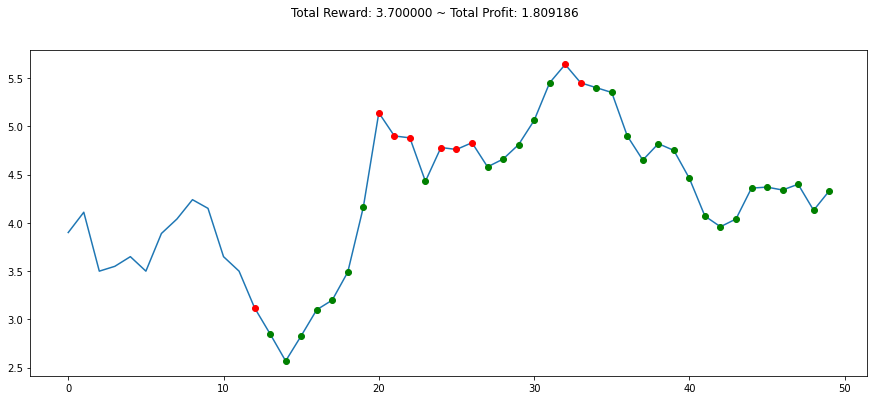

In [98]:
# Evaluation du modéle A2C
#env = gym.make('stocks-v0', df=df, frame_bound=(90, 110), window_size=5)
env = env2
model = train_A2C(env, timesteps)
evalmodel(env, model)

Wrapping the env in a DummyVecEnv.
--------------------------------------
| approxkl           | 0.00013689866 |
| clipfrac           | 0.0           |
| explained_variance | -1.35         |
| fps                | 275           |
| n_updates          | 1             |
| policy_entropy     | 0.6929909     |
| policy_loss        | -0.0031444947 |
| serial_timesteps   | 128           |
| time_elapsed       | 0             |
| total_timesteps    | 128           |
| value_loss         | 0.54714924    |
--------------------------------------
--------------------------------------
| approxkl           | 0.0001320728  |
| clipfrac           | 0.0           |
| explained_variance | -0.642        |
| fps                | 848           |
| n_updates          | 2             |
| policy_entropy     | 0.692196      |
| policy_loss        | -0.0027097282 |
| serial_timesteps   | 256           |
| time_elapsed       | 0.466         |
| total_timesteps    | 256           |
| value_loss         | 0.3181

-------------------------------------
| approxkl           | 0.0002406488 |
| clipfrac           | 0.0          |
| explained_variance | 0.766        |
| fps                | 1000         |
| n_updates          | 18           |
| policy_entropy     | 0.6619056    |
| policy_loss        | -0.00267816  |
| serial_timesteps   | 2304         |
| time_elapsed       | 2.56         |
| total_timesteps    | 2304         |
| value_loss         | 0.11239335   |
-------------------------------------
-------------------------------------
| approxkl           | 0.0004460183 |
| clipfrac           | 0.0          |
| explained_variance | 0.685        |
| fps                | 928          |
| n_updates          | 19           |
| policy_entropy     | 0.6589868    |
| policy_loss        | -0.006964067 |
| serial_timesteps   | 2432         |
| time_elapsed       | 2.69         |
| total_timesteps    | 2432         |
| value_loss         | 0.08174448   |
-------------------------------------
------------

--------------------------------------
| approxkl           | 0.00083554897 |
| clipfrac           | 0.0           |
| explained_variance | 0.915         |
| fps                | 1000          |
| n_updates          | 35            |
| policy_entropy     | 0.5357382     |
| policy_loss        | -0.0049341335 |
| serial_timesteps   | 4480          |
| time_elapsed       | 5.5           |
| total_timesteps    | 4480          |
| value_loss         | 0.038568716   |
--------------------------------------
--------------------------------------
| approxkl           | 0.00018972931 |
| clipfrac           | 0.0           |
| explained_variance | 0.871         |
| fps                | 802           |
| n_updates          | 36            |
| policy_entropy     | 0.50991225    |
| policy_loss        | -0.002511112  |
| serial_timesteps   | 4608          |
| time_elapsed       | 5.63          |
| total_timesteps    | 4608          |
| value_loss         | 0.07995792    |
-------------------------

-------------------------------------
| approxkl           | 0.0007701411 |
| clipfrac           | 0.001953125  |
| explained_variance | 0.958        |
| fps                | 897          |
| n_updates          | 52           |
| policy_entropy     | 0.41852987   |
| policy_loss        | -0.00571093  |
| serial_timesteps   | 6656         |
| time_elapsed       | 8            |
| total_timesteps    | 6656         |
| value_loss         | 0.034324717  |
-------------------------------------
--------------------------------------
| approxkl           | 0.00065417076 |
| clipfrac           | 0.005859375   |
| explained_variance | 0.927         |
| fps                | 991           |
| n_updates          | 53            |
| policy_entropy     | 0.40051556    |
| policy_loss        | -0.0056913197 |
| serial_timesteps   | 6784          |
| time_elapsed       | 8.14          |
| total_timesteps    | 6784          |
| value_loss         | 0.04632553    |
--------------------------------------

-------------------------------------
| approxkl           | 0.0007887377 |
| clipfrac           | 0.00390625   |
| explained_variance | 0.854        |
| fps                | 804          |
| n_updates          | 69           |
| policy_entropy     | 0.31319976   |
| policy_loss        | -0.006126587 |
| serial_timesteps   | 8832         |
| time_elapsed       | 10.8         |
| total_timesteps    | 8832         |
| value_loss         | 0.08741691   |
-------------------------------------
--------------------------------------
| approxkl           | 0.00088301697 |
| clipfrac           | 0.0078125     |
| explained_variance | 0.978         |
| fps                | 820           |
| n_updates          | 70            |
| policy_entropy     | 0.3007318     |
| policy_loss        | -0.0023805073 |
| serial_timesteps   | 8960          |
| time_elapsed       | 11            |
| total_timesteps    | 8960          |
| value_loss         | 0.025204951   |
--------------------------------------

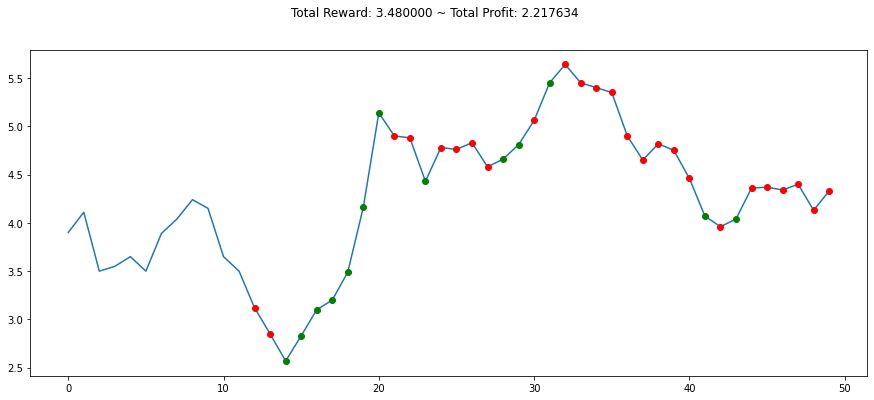

In [99]:
# Evaluation du modéle PPO
#env = gym.make('stocks-v0', df=df, frame_bound=(90, 110), window_size=5)
env = env2
model = train_PPO(env, timesteps)
evalmodel(env, model)